# ===============================================
# PREDICTING PRICE OF PRE-OWNED CARS 
# ===============================================


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# Setting dimensions for plot 


In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


# Reading CSV file


In [4]:
# Reading CSV file
cars_data=pd.read_csv('cars_sampled.csv' )


# Creating copy


In [5]:
# Creating copy
cars=cars_data.copy()


# Structure of the dataset


In [6]:
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

# Summarizing data


In [7]:
# Summarizing data
cars.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x) #to get rid of scientificc notation
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [8]:
# To display maximum set of columns
pd.set_option('display.max_columns', 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


The huge difference in the price mean and median shows that the price is very skewed

# Dropping unwanted columns


In [9]:
# Dropping unwanted columns
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col, axis=1)

# Removing duplicate records


In [10]:
# Removing duplicate records
cars.drop_duplicates(keep='first',inplace=True)
#470 duplicate records

# Data cleaning


In [11]:
# No. of missing values in each column
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [12]:
# Variable yearOfRegistration
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()
sum(cars['yearOfRegistration'] > 2018)


26

In [13]:
sum(cars['yearOfRegistration'] < 1950)


38

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

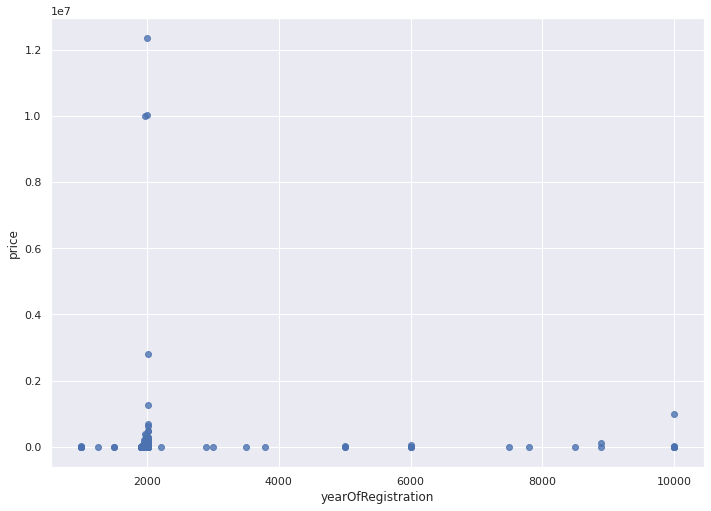

In [14]:
sns.regplot(x='yearOfRegistration', y='price', scatter=True, 
            fit_reg=False, data=cars)
# Working range- 1950 and 2018

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

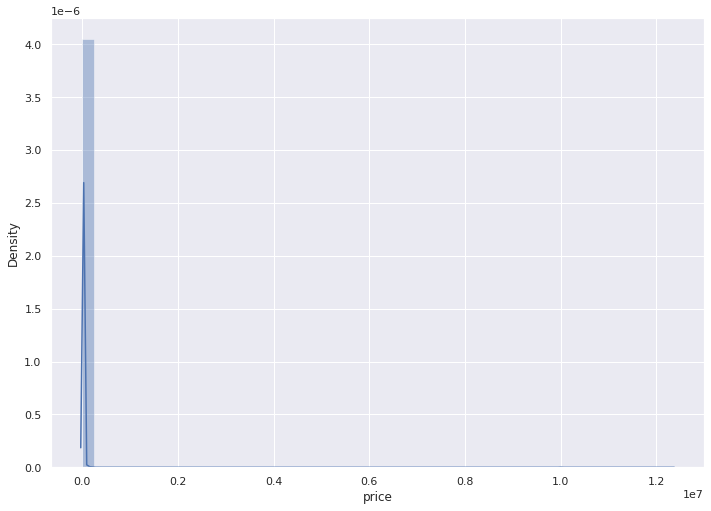

In [15]:
# Variable price
price_count=cars['price'].value_counts().sort_index()
sns.distplot(cars['price'])


In [16]:
cars['price'].describe()


count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

<AxesSubplot:ylabel='price'>

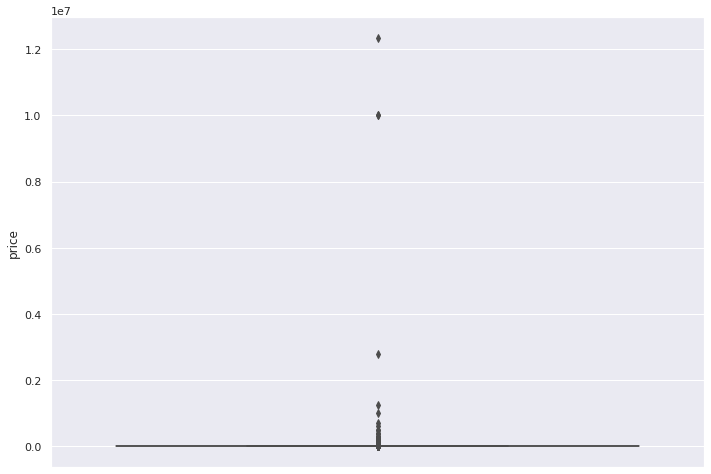

In [17]:
sns.boxplot(y=cars['price'])


In [18]:
print(sum(cars['price'] > 150000))
print(sum(cars['price'] < 100))
# Working range- 100 and 150000

34
1748


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

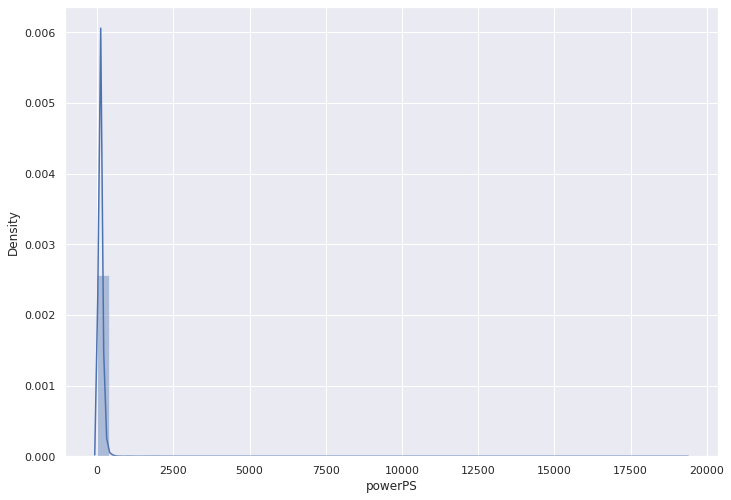

In [19]:
# Variable powerPS
power_count=cars['powerPS'].value_counts().sort_index()
sns.distplot(cars['powerPS'])

In [20]:
cars['powerPS'].describe()


count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

<AxesSubplot:ylabel='powerPS'>

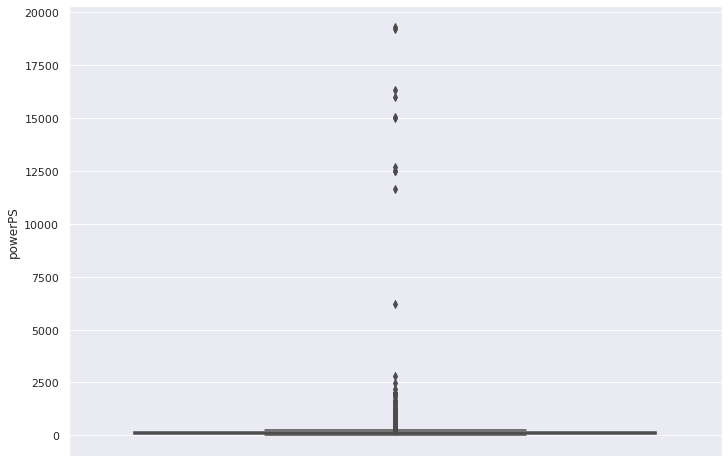

In [21]:
sns.boxplot(y=cars['powerPS'])


<AxesSubplot:xlabel='powerPS', ylabel='price'>

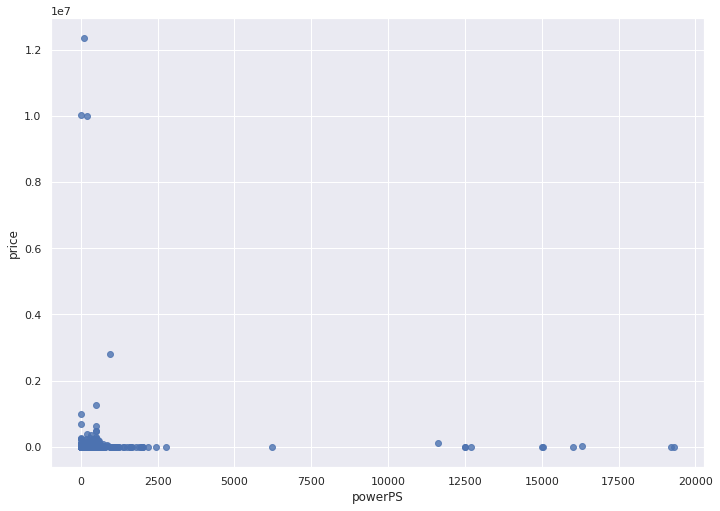

In [22]:
sns.regplot(x='powerPS', y='price', scatter=True, 
            fit_reg=False, data=cars)

In [23]:
print(sum(cars['powerPS'] > 500))
print(sum(cars['powerPS'] < 10))
# Working range- 10 and 500

115
5565


# Working range of data


In [24]:
# Working range of data
cars = cars[
        (cars.yearOfRegistration <= 2018) 
      & (cars.yearOfRegistration >= 1950) 
      & (cars.price >= 100) 
      & (cars.price <= 150000) 
      & (cars.powerPS >= 10) 
      & (cars.powerPS <= 500)]
# ~6700 records are dropped

In [25]:
# Further to simplify- variable reduction
# Combining yearOfRegistration and monthOfRegistration

cars['monthOfRegistration']/=12

<ipython-input-25-bdd215b1024a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['monthOfRegistration']/=12


In [26]:
# Creating new varible Age by adding yearOfRegistration and monthOfRegistration
cars['Age']=(2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

<ipython-input-26-ce65400255ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['Age']=(2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
<ipython-input-26-ce65400255ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['Age']=round(cars['Age'],2)


count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [27]:
# Dropping yearOfRegistration and monthOfRegistration
cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)


# Visualizing parameters 


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

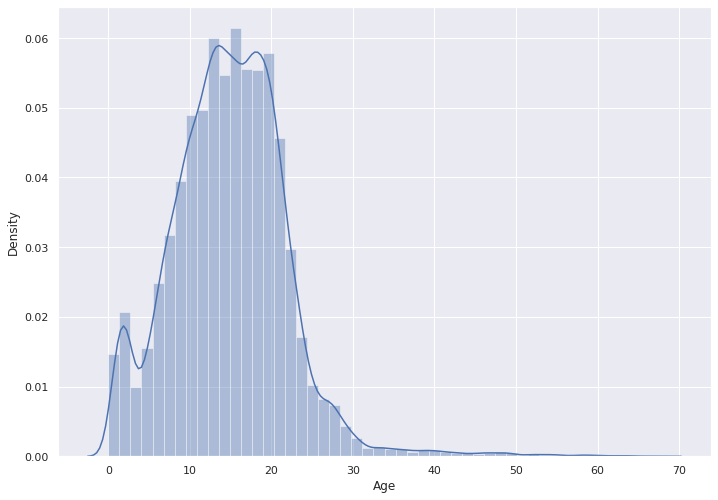

In [28]:
# Age
sns.distplot(cars['Age'])

<AxesSubplot:ylabel='Age'>

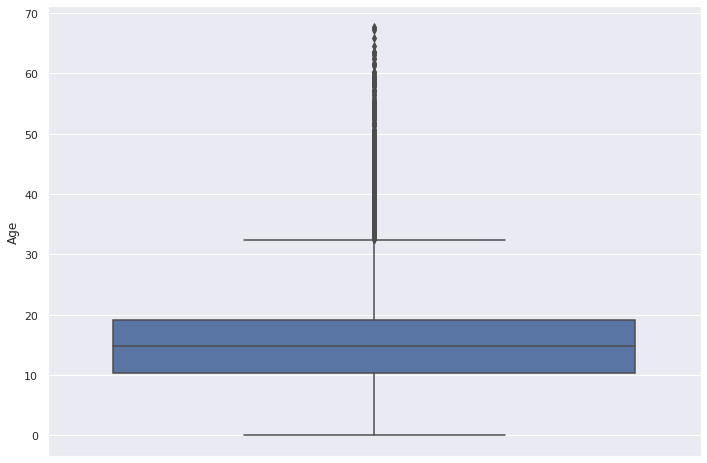

In [29]:
sns.boxplot(y=cars['Age'])


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

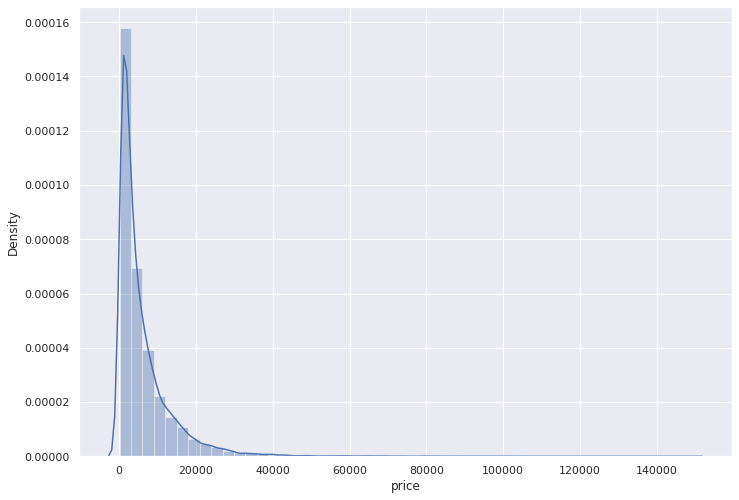

In [30]:
# price
sns.distplot(cars['price'])

<AxesSubplot:ylabel='price'>

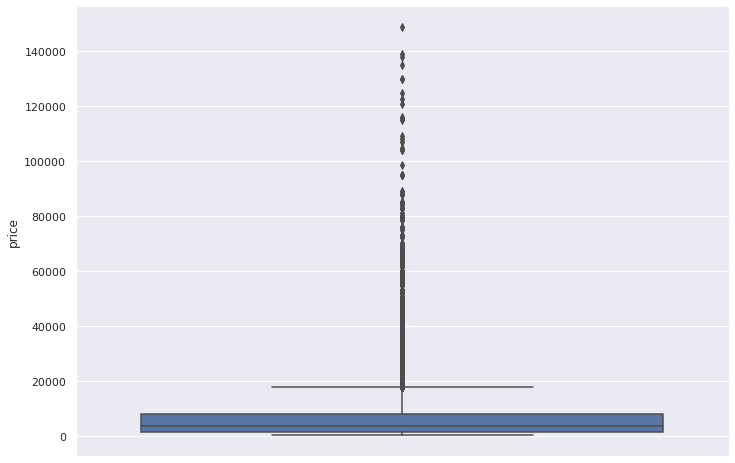

In [31]:
sns.boxplot(y=cars['price'])


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

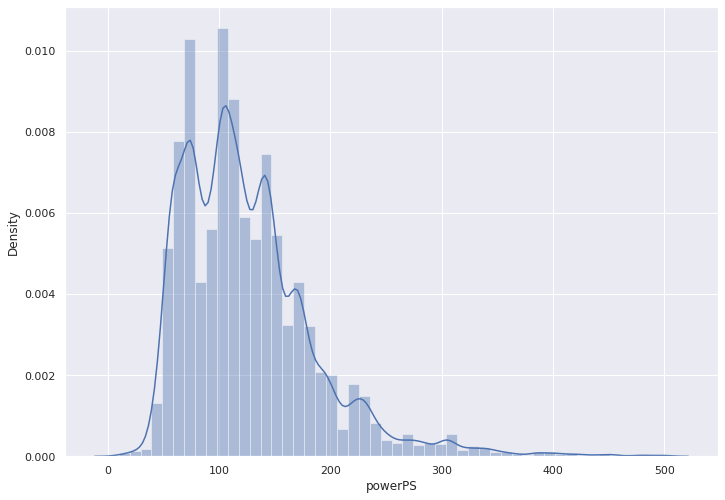

In [32]:
# powerPS
sns.distplot(cars['powerPS'])

<AxesSubplot:ylabel='price'>

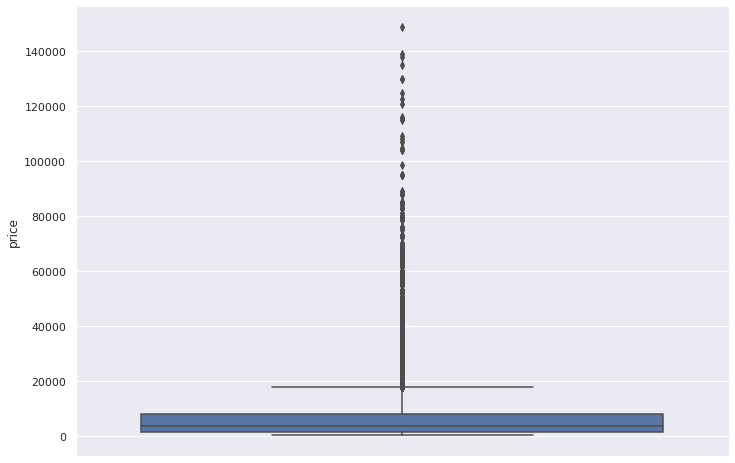

In [33]:
sns.boxplot(y=cars['price'])


# Visualizing parameters after narrowing working range


<AxesSubplot:xlabel='Age', ylabel='price'>

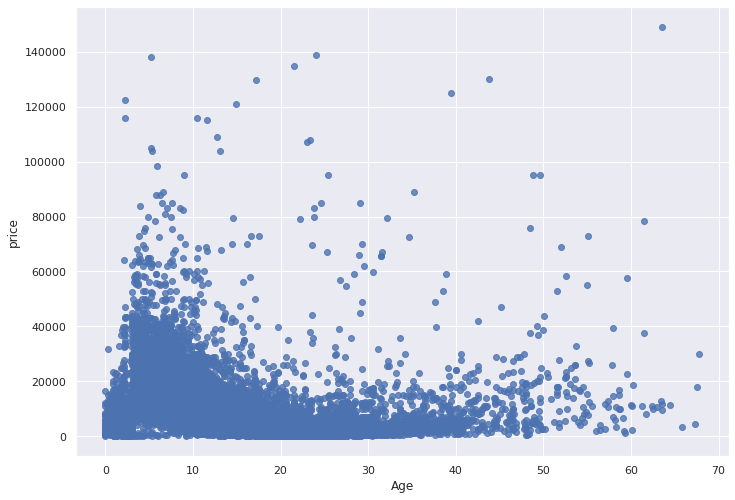

In [34]:
# Age vs price
sns.regplot(x='Age', y='price', scatter=True, 
            fit_reg=False, data=cars)
# Cars priced higher are newer
# With increase in age, price decreases
# However some cars are priced higher with increase in age


<AxesSubplot:xlabel='powerPS', ylabel='price'>

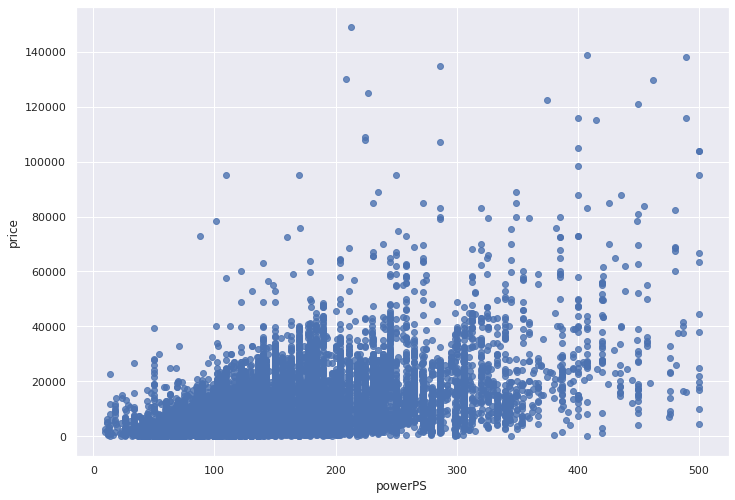

In [35]:
# powerPS vs price
sns.regplot(x='powerPS', y='price', scatter=True, 
            fit_reg=False, data=cars)

<AxesSubplot:xlabel='seller', ylabel='count'>

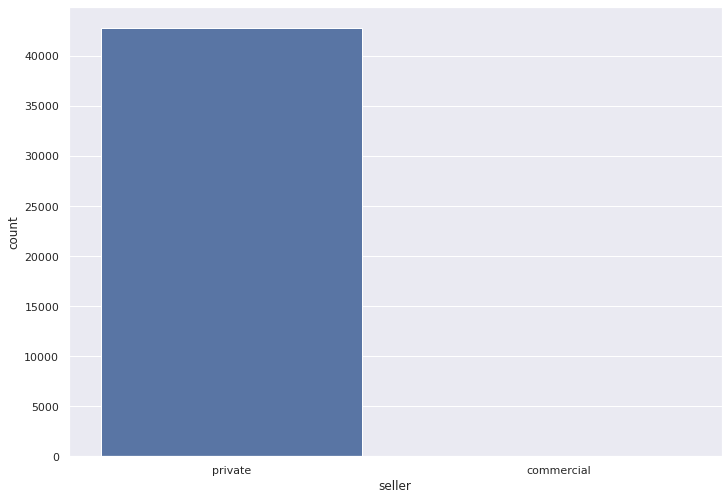

In [36]:
# Variable seller
cars['seller'].value_counts()
pd.crosstab(cars['seller'],columns='count',normalize=True)
sns.countplot(x= 'seller',data=cars)
# Fewer cars have 'commercial'=> Insignificant


<AxesSubplot:xlabel='offerType', ylabel='count'>

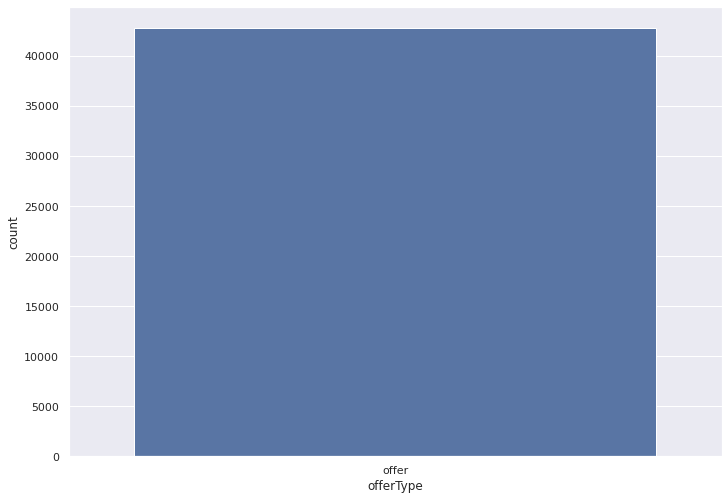

In [37]:
# Variable offerType
cars['offerType'].value_counts()
sns.countplot(x= 'offerType',data=cars)
# All cars have 'offer'=> Insignificant


<AxesSubplot:xlabel='abtest', ylabel='count'>

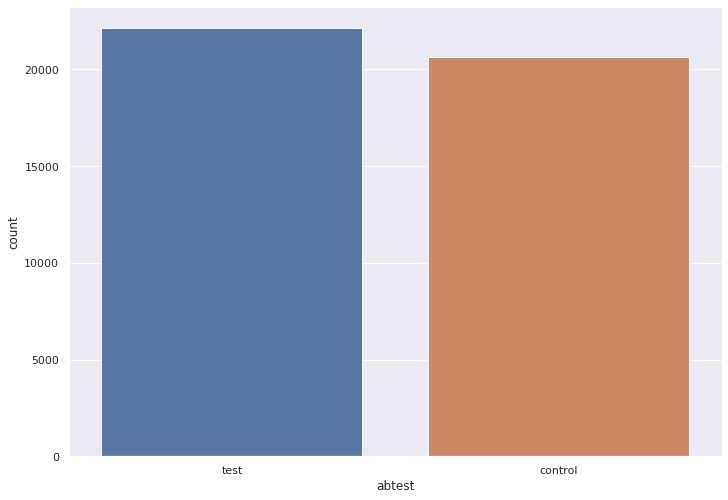

In [38]:
# Variable abtest
cars['abtest'].value_counts()
pd.crosstab(cars['abtest'],columns='count',normalize=True)
sns.countplot(x= 'abtest',data=cars)

<AxesSubplot:xlabel='abtest', ylabel='price'>

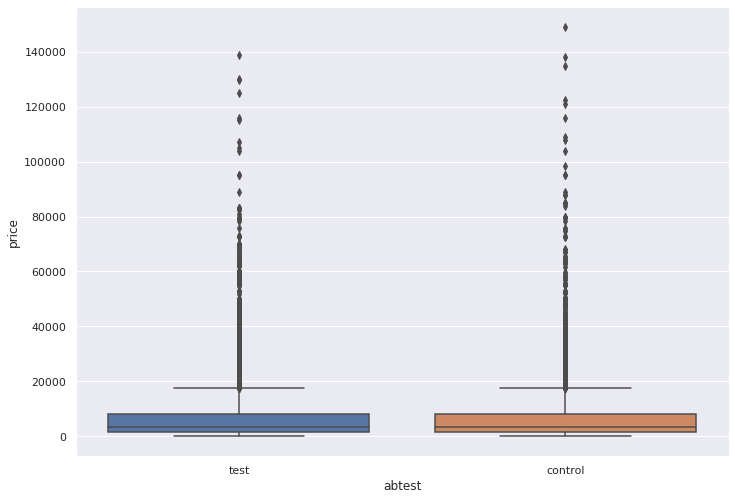

In [39]:
# Equally distributed
sns.boxplot(x= 'abtest',y='price',data=cars)
# For every price value there is almost 50-50 distribution
# Does not affect price => Insignificant


<AxesSubplot:xlabel='vehicleType', ylabel='count'>

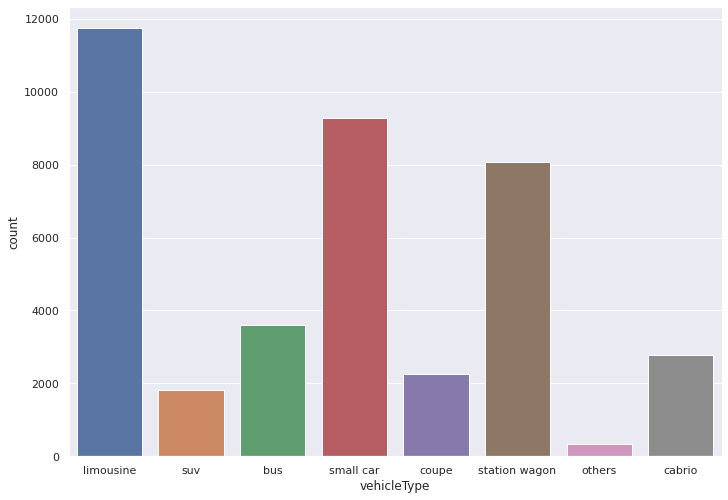

In [40]:
# Variable vehicleType
cars['vehicleType'].value_counts()
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)
sns.countplot(x= 'vehicleType',data=cars)


<AxesSubplot:xlabel='vehicleType', ylabel='price'>

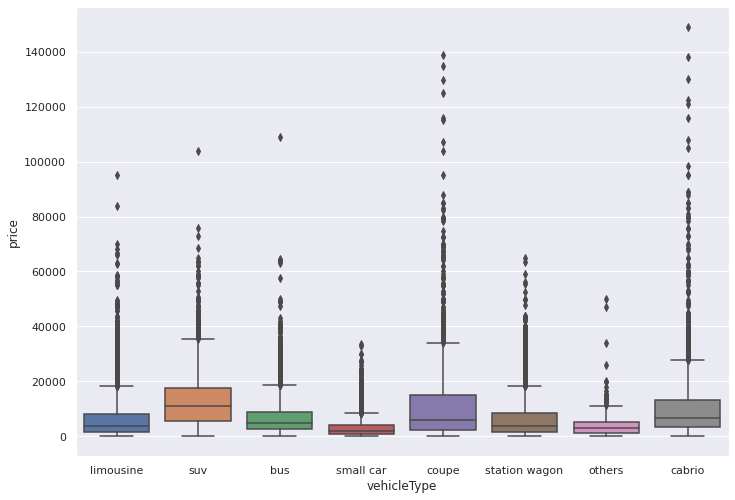

In [41]:
sns.boxplot(x= 'vehicleType',y='price',data=cars)
# 8 types- limousine, small cars and station wagons max freq
# vehicleType affects price 


<AxesSubplot:xlabel='gearbox', ylabel='count'>

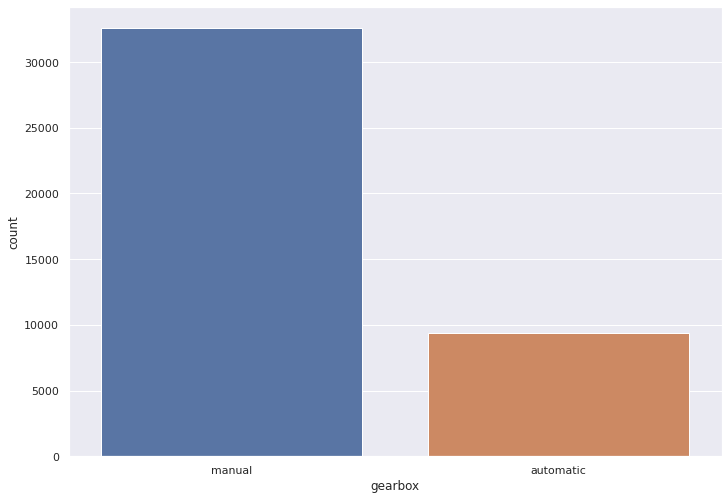

In [42]:
# Variable gearbox
cars['gearbox'].value_counts()
pd.crosstab(cars['gearbox'],columns='count',normalize=True)
sns.countplot(x= 'gearbox',data=cars)


<AxesSubplot:xlabel='gearbox', ylabel='price'>

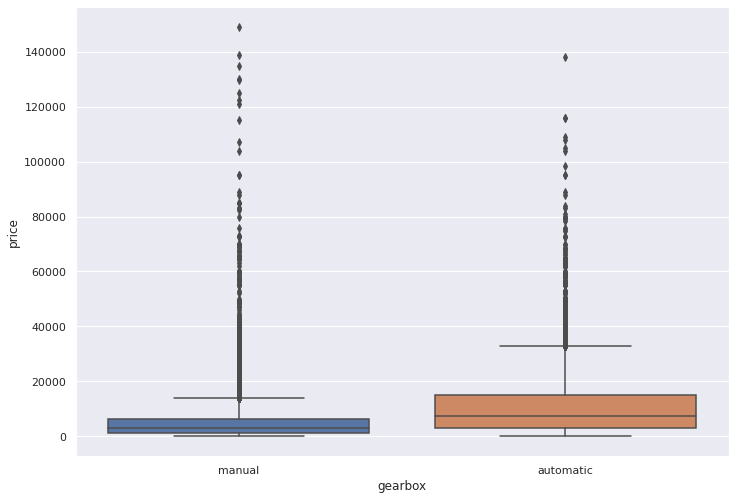

In [43]:
sns.boxplot(x= 'gearbox',y='price',data=cars)
# gearbox affects price 


<AxesSubplot:xlabel='model', ylabel='count'>

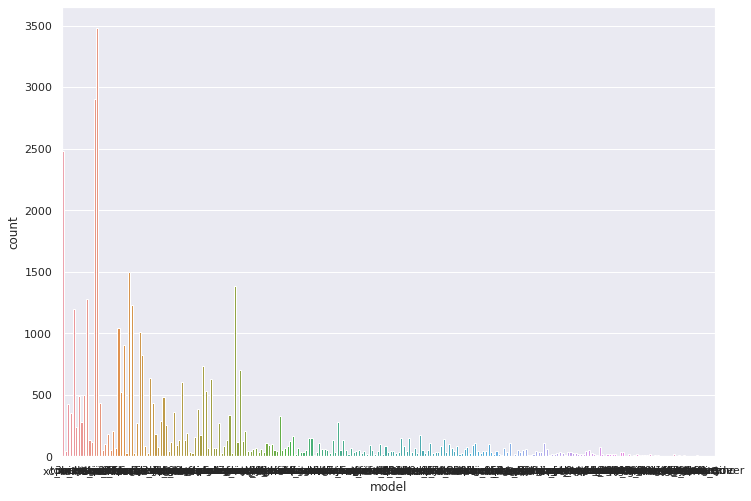

In [44]:
# Variable model
cars['model'].value_counts()
pd.crosstab(cars['model'],columns='count',normalize=True)
sns.countplot(x= 'model',data=cars)


<AxesSubplot:xlabel='model', ylabel='price'>

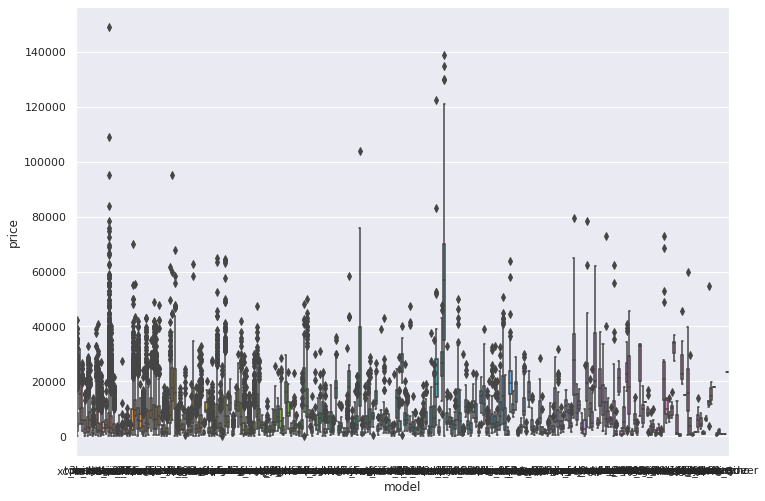

In [45]:
sns.boxplot(x= 'model',y='price',data=cars)
# Cars are distributed over many models
# Considered in modelling


<AxesSubplot:xlabel='kilometer', ylabel='price'>

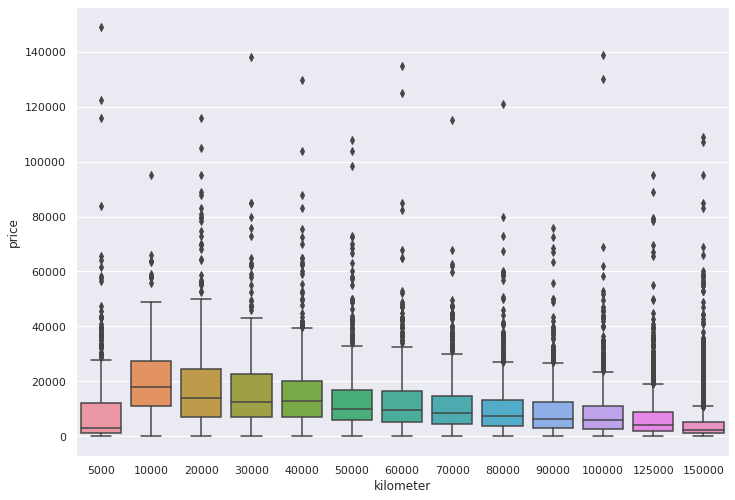

In [46]:
# Variable kilometer
cars['kilometer'].value_counts().sort_index()
pd.crosstab(cars['kilometer'],columns='count',normalize=True)
sns.boxplot(x= 'kilometer',y='price',data=cars)


In [47]:
cars['kilometer'].describe()


count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kilometer'>

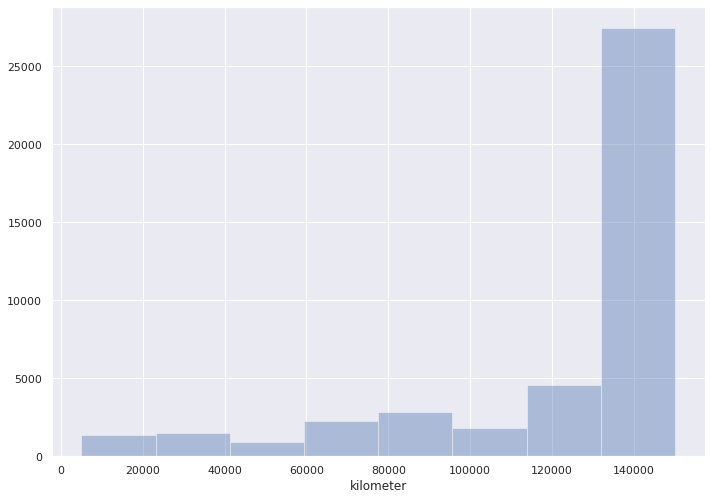

In [48]:
sns.distplot(cars['kilometer'],bins=8 ,kde=False)


<AxesSubplot:xlabel='kilometer', ylabel='price'>

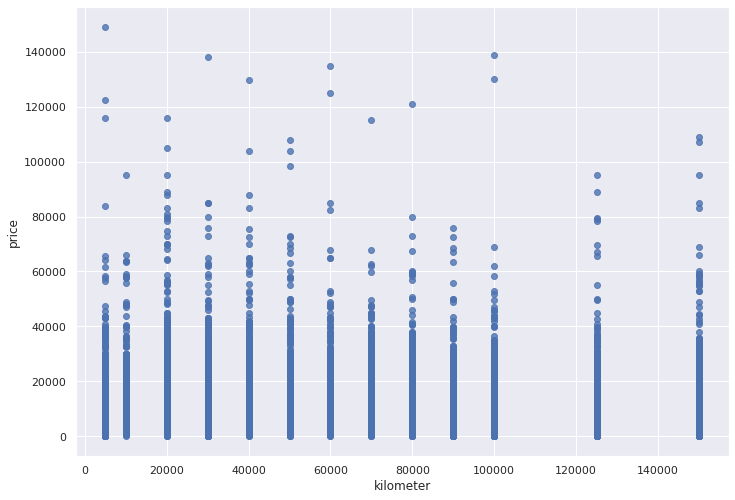

In [49]:
sns.regplot(x='kilometer', y='price', scatter=True, 
            fit_reg=False, data=cars)
# Considered in modelling


In [50]:
# Variable fuelType
cars['fuelType'].value_counts()


petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

In [51]:
pd.crosstab(cars['fuelType'],columns='count',normalize=True)


col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


<AxesSubplot:xlabel='fuelType', ylabel='count'>

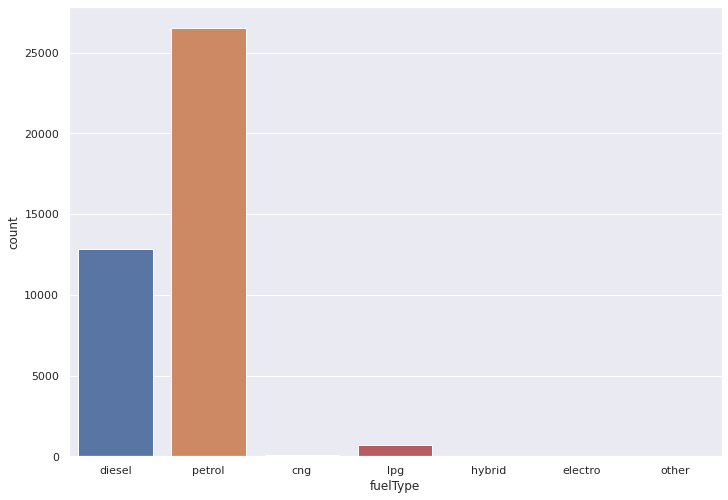

In [52]:
sns.countplot(x= 'fuelType',data=cars)


<AxesSubplot:xlabel='fuelType', ylabel='price'>

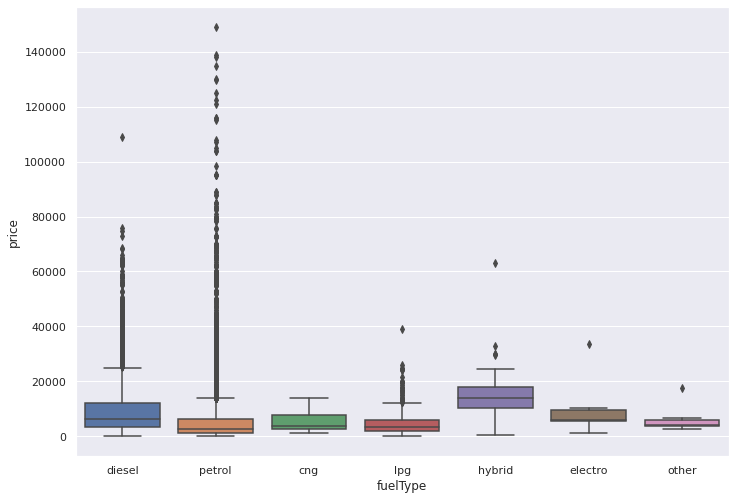

In [53]:
sns.boxplot(x= 'fuelType',y='price',data=cars)
# fuelType affects price

In [54]:
# Variable brand
cars['brand'].value_counts()


volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
rover               53
daewoo              53
trabant             43
lada                22
Name: brand, dtype: int64

In [55]:
pd.crosstab(cars['brand'],columns='count',normalize=True)


col_0,count
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


<AxesSubplot:xlabel='brand', ylabel='count'>

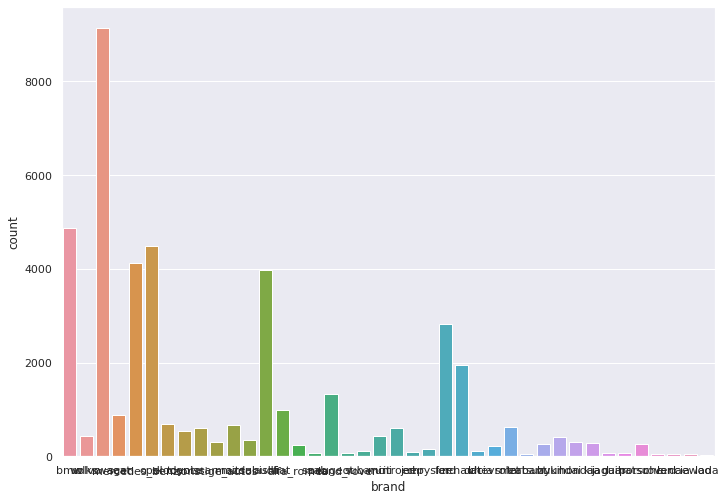

In [56]:
sns.countplot(x= 'brand',data=cars)


<AxesSubplot:xlabel='brand', ylabel='price'>

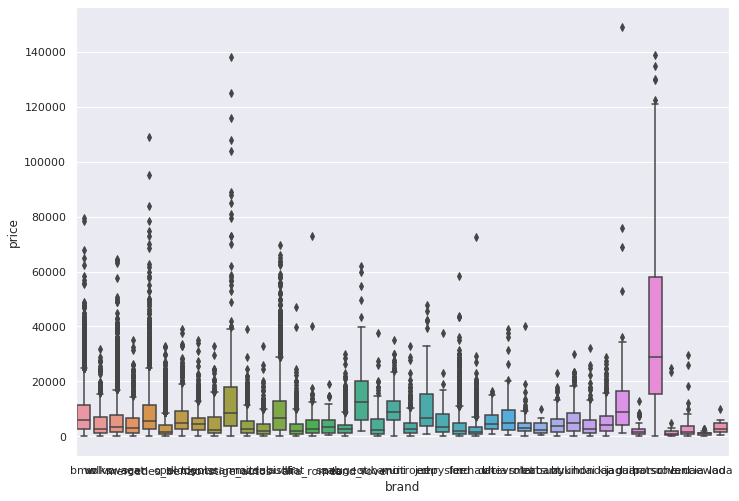

In [57]:
sns.boxplot(x= 'brand',y='price',data=cars)
# Cars are distributed over many brands
# Considered for modelling 

In [58]:
# Variable notRepairedDamage
# yes- car is damaged but not rectified
# no- car was damaged but has been rectified
cars['notRepairedDamage'].value_counts()


no     32507
yes     3988
Name: notRepairedDamage, dtype: int64

In [59]:
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)


col_0,count
notRepairedDamage,
no,0.891
yes,0.109


<AxesSubplot:xlabel='notRepairedDamage', ylabel='count'>

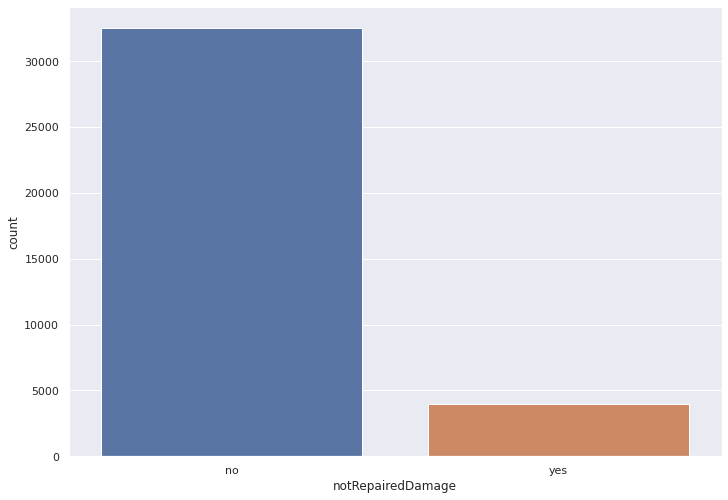

In [60]:
sns.countplot(x= 'notRepairedDamage',data=cars)


<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

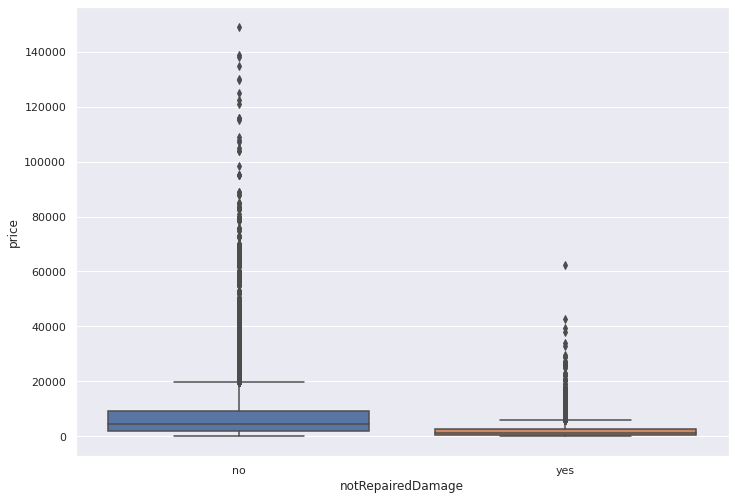

In [61]:
sns.boxplot(x= 'notRepairedDamage',y='price',data=cars)
# As expected, the cars that require the damages to be repaired
# fall under lower price ranges


# Removing insignificant variables


In [62]:
col=['seller','offerType','abtest']
cars=cars.drop(columns=col, axis=1)
cars_copy=cars.copy()

# Correlation


In [63]:
cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
round(correlation,3)   
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]                          


powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

"""
We are going to build a Linear Regression and Random Forest model
on two sets of data.
1. Data obtained by omitting rows with any missing value
2. Data obtained by imputing the missing values 
"""

# OMITTING MISSING VALUES


In [64]:
cars_omit=cars.dropna(axis=0)


In [65]:
# Converting categorical variables to dummy variables
cars_omit=pd.get_dummies(cars_omit,drop_first=True) 


# IMPORTING NECESSARY LIBRARIES


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# MODEL BUILDING WITH OMITTED DATA


In [67]:
# Separating input and output features
x1 = cars_omit.drop(['price'], axis='columns', inplace=False)
y1 = cars_omit['price']

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

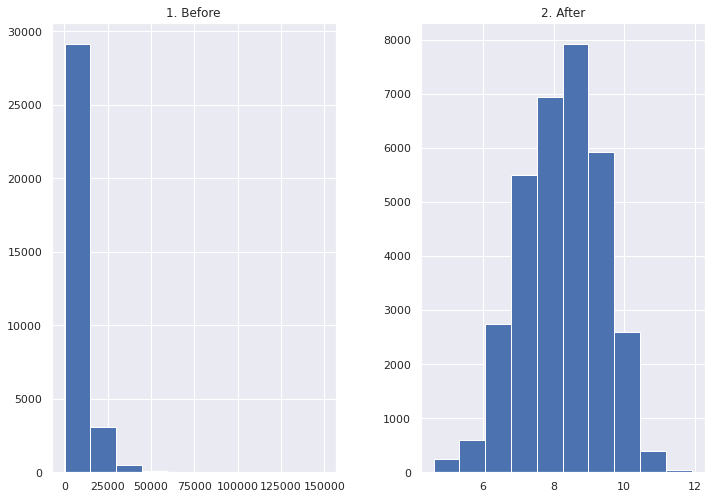

In [68]:
# Plotting the variable price # Taking log values because range of price is very huge
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()

Right hand side is bellshaped and Left hand side is skewed. Thus we consider log

In [69]:
# Transforming price as a logarithmic value
y1 = np.log(y1)


In [70]:
# Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#random state is mentioned so that same set of value go to train test 


(23018, 300) (9866, 300) (23018,) (9866,)


# BASELINE MODEL FOR OMITTED DATA


"""
We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model
"""

In [71]:
# finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)

8.249615787653267


In [72]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test))

In [73]:
# finding the RMSE
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
                               
print(base_root_mean_square_error)


1.1274483657478247


# LINEAR REGRESSION WITH OMITTED DATA


In [74]:
# Setting intercept as true
lgr=LinearRegression(fit_intercept=True)


In [75]:
# Model
model_lin1=lgr.fit(X_train,y_train)


In [76]:
# Predicting model on test set
cars_predictions_lin1 = lgr.predict(X_test)


In [77]:
# Computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)


0.545548126651383


In [78]:
# R squared value
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
print(r2_lin_test1,r2_lin_train1)


0.7658615091649252 0.7800936978183916


count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

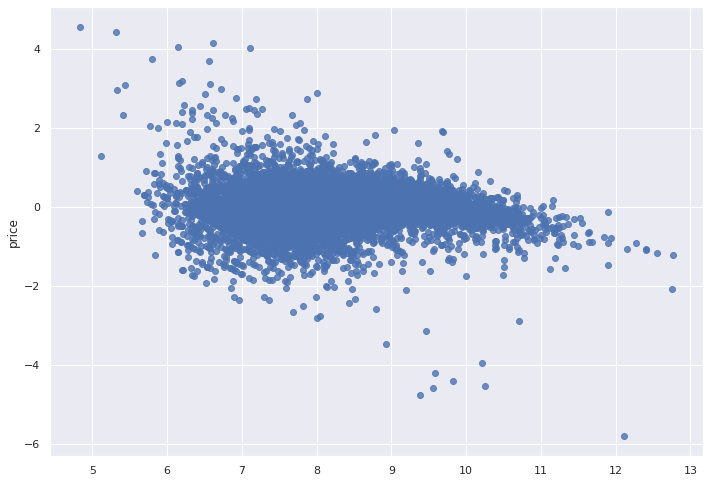

In [79]:
# Regression diagnostics- Residual plot analysis
residuals1=y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1, y=residuals1, scatter=True, 
            fit_reg=False)
residuals1.describe()


As the values are all close to 0. The difference between predicted and residual values.

# RANDOM FOREST WITH OMITTED DATA


In [80]:
# Model parameters
rf = RandomForestRegressor(n_estimators = 100,max_features='auto',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)


In [81]:
# Model
model_rf1=rf.fit(X_train,y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [82]:
# Predicting model on test set
cars_predictions_rf1 = rf.predict(X_test)


In [83]:
# Computing MSE and RMSE
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)


0.4360736289370223


In [84]:
# R squared value
r2_rf_test1=model_rf1.score(X_test,y_test)
r2_rf_train1=model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)   


0.8504018147750623 0.9202494705146291


# MODEL BUILDING WITH IMPUTED DATA


In [85]:
cars_imputed = cars.apply(lambda x:x.fillna(x.median()) \
                  if x.dtype=='float' else \
                  x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()


price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [86]:
# Converting categorical variables to dummy variables
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True) 


# MODEL BUILDING WITH IMPUTED DATA


In [87]:
# Separating input and output feature
x2 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_imputed['price']


array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

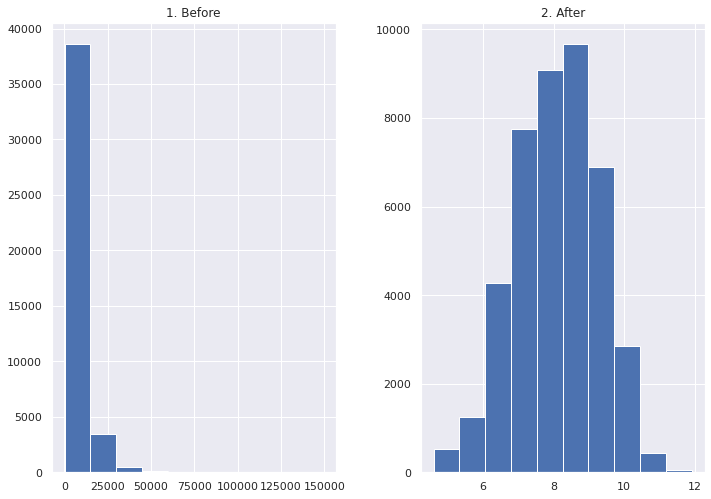

In [88]:
# Plotting the variable price
prices = pd.DataFrame({"1. Before":y2, "2. After":np.log(y2)})
prices.hist()


In [89]:
# Transforming price as a logarithmic value
y2 = np.log(y2)


In [90]:
# Splitting data into test and train
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size=0.3, random_state = 3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)


(29940, 303) (12832, 303) (29940,) (12832,)


# BASELINE MODEL FOR IMPUTED DATA


"""
We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model
"""

In [91]:
# finding the mean for test data value
base_pred = np.mean(y_test1)
print(base_pred)

8.068391740519065


In [92]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test1))


In [93]:
# finding the RMSE
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1, base_pred))
 

In [94]:
print(base_root_mean_square_error_imputed)


1.1884349112889792


# LINEAR REGRESSION WITH IMPUTED DATA


In [95]:
# Setting intercept as true
lgr2=LinearRegression(fit_intercept=True)


In [96]:
# Model
model_lin2=lgr2.fit(X_train1,y_train1)


In [97]:
# Predicting model on test set
cars_predictions_lin2 = lgr2.predict(X_test1)


In [98]:
# Computing MSE and RMSE
lin_mse2 = mean_squared_error(y_test1, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)


0.64839564492313


In [99]:
# R squared value
r2_lin_test2=model_lin2.score(X_test1,y_test1)
r2_lin_train2=model_lin2.score(X_train1,y_train1)
print(r2_lin_test2,r2_lin_train2)

0.7023339008631182 0.7071658736894363


# RANDOM FOREST WITH IMPUTED DATA


In [100]:
# Model parameters
rf2 = RandomForestRegressor(n_estimators = 100,max_features='auto',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)


In [101]:
# Model
model_rf2=rf2.fit(X_train1,y_train1)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [102]:
# Predicting model on test set
cars_predictions_rf2 = rf2.predict(X_test1)


In [103]:
# Computing MSE and RMSE
rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)


0.494313994408829


In [104]:
# R squared value
r2_rf_test2=model_rf2.score(X_test1,y_test1)
r2_rf_train2=model_rf2.score(X_train1,y_train1)
print(r2_rf_test2,r2_rf_train2)                            


0.8269964521311131 0.9024289431669166


In [105]:
# Final output

print("Metrics for models built from data where missing values were omitted")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train1)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test1)
print("R squared value for train from Random Forest=  %s"% r2_rf_train1)
print("R squared value for test from Random Forest=  %s"% r2_rf_test1)
print("Base RMSE of model built from data where missing values were omitted= %s"%base_root_mean_square_error)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse1)
print("RMSE value for test from Random Forest=  %s"% rf_rmse1)
print("\n\n")
print("Metrics for models built from data where missing values were imputed")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train2)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test2)
print("R squared value for train from Random Forest=  %s"% r2_rf_train2)
print("R squared value for test from Random Forest=  %s"% r2_rf_test2)
print("Base RMSE of model built from data where missing values were imputed= %s"%base_root_mean_square_error_imputed)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse2)
print("RMSE value for test from Random Forest=  %s"% rf_rmse2)


Metrics for models built from data where missing values were omitted
R squared value for train from Linear Regression=  0.7800936978183916
R squared value for test from Linear Regression=  0.7658615091649252
R squared value for train from Random Forest=  0.9202494705146291
R squared value for test from Random Forest=  0.8504018147750623
Base RMSE of model built from data where missing values were omitted= 1.1274483657478247
RMSE value for test from Linear Regression=  0.545548126651383
RMSE value for test from Random Forest=  0.4360736289370223



Metrics for models built from data where missing values were imputed
R squared value for train from Linear Regression=  0.7071658736894363
R squared value for test from Linear Regression=  0.7023339008631182
R squared value for train from Random Forest=  0.9024289431669166
R squared value for test from Random Forest=  0.8269964521311131
Base RMSE of model built from data where missing values were imputed= 1.1884349112889792
RMSE value for tes

It can be seen that in both omitted and imputed data, the Random Forest Model is performing better than Linear Regression Model.
